##  Objetivos do negócio.

A bolsa de valores de commodities opera num sistema de contratos futuros, no qual os investidores pode apostar no aumento ou queda do preço de matérias primas de forma a vendê-las mais caro depois. O sucesso de um investimento nesse mercado depende da capacidade de um agente economico de conseguir prever a direção que o preço tomará. O objetivo desse trabalho é localizar padrões na flutuação do preço das diferentes commodities presentes e criar um modelo que possa determinar com alguma precisão qual deve ser a próxima ação a se tomar.

### Acess Situation

Esse projeto visa a criação de um workflow utilizando o pacote sci-kit learn. Para a formulação da base de dados será provavelmente necessário o uso de multiplas fontes, e pode pontecialmente envolver metódos de scraping para o recolhimento de dados mais específicos. Se o mercado não tiver muitos padrões de comportamento existe a possibilidade do modelo desenvolvido não ser preciso, o que o tornará obsoleto. Entranto como isso é um trabalho universitário o custo  falha ou do sucesso desse modelo influencia somente a minha nota.

## Data understanding

### Coleta de dados 

Fontes dos dados
https://www.ncdc.noaa.gov/cag/statewide/time-series/47/tavg/all/8/1996-2021?base_prd=true&begbaseyear=1901&endbaseyear=2000
https://www.indexmundi.com/commodities/
https://www.cropprophet.com/us-corn-production-by-state/#2010
https://chaipredict.com/blog-2/2020/1/2-six-factors-affecting-commodity-price-volatility
https://www.westfieldinsurance.com/resources/articles/what-are-the-main-uses-of-corn

A coleta incial dos dados foi realizada anteriormente, conforme a seção acima. Devido ao grande número de variáveis coletadas não faz sentido mostrar o processo de criação da base de dados. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MaxAbsScaler
%matplotlib inline
abs_scaler = MaxAbsScaler()
from sklearn.ensemble import RandomForestRegressor


%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import keras


In [4]:
df = pd.read_csv("tab2.csv")
df.dropna(how = "any",inplace = True)
df.head(10)

,Month,Price,Change,Iowa,Minesota,Nebraska,Illinois,Indiana,Kansas,South Dakota,Ohio,Missouri,Winsconsin,Soybean oil price,Soybean meal price,Sugarcane kg,Crude Oil Barrel,Gasoline Gallon
0,1996/08,185.50,-6.22 %,70.0,67.4,70.6,73.5,72.7,74.5,71.2,71.4,74.8,67.1,565.0,270.0,0.27,20.44,0.61
1,1996/09,145.39,-21.62 %,60.7,57.6,60.3,64.2,63.9,65.0,58.8,63.5,64.8,58.8,569.0,286.0,0.26,22.26,0.62
2,1996/10,127.85,-12.06 %,51.7,45.2,50.8,54.8,54.4,56.3,46.9,53.4,56.6,46.7,528.0,270.0,0.25,23.61,0.66
3,1996/11,117.74,-7.91 %,29.0,20.3,30.0,34.9,35.7,38.2,22.0,35.6,38.1,25.8,517.0,274.0,0.24,22.39,0.69
4,1996/12,117.69,-0.04 %,19.6,8.8,22.8,30.5,33.0,32.1,11.5,35.4,34.0,17.9,514.0,279.0,0.24,23.62,0.69
5,1997/01,118.36,0.57 %,14.6,4.5,21.2,21.4,23.1,28.6,10.6,25.9,26.4,11.6,534.0,280.0,0.24,23.23,0.67
6,1997/02,121.67,2.80 %,25.0,15.0,29.4,33.6,34.7,34.8,22.8,34.6,37.4,20.7,527.0,282.0,0.24,20.42,0.62
7,1997/03,127.60,4.87 %,37.2,24.0,40.2,42.9,42.3,46.6,31.9,41.4,47.0,28.9,541.0,300.0,0.24,19.33,0.61
8,1997/04,124.40,-2.51 %,44.3,38.8,42.4,47.6,46.9,48.6,39.5,46.2,50.0,41.1,541.0,301.0,0.25,17.88,0.59
9,1997/05,118.77,-4.53 %,54.2,49.6,55.2,57.6,56.2,60.7,53.1,54.4,59.8,49.3,541.0,300.0,0.24,19.37,0.62


### Descrição de dados

Os dados selecionados contém as médias de temperaturas de todos os meses, dos estados americanos de Iowa, Illinois, Nebraska, Minnesota, e Indiana, entre Agosto de 1996 à Julho de 2021. Há também a evolução dos preços de outras commodities consideradas como bens subistitutos do milho ou de produtos derivados de milho. A última tabela selecionada inclui o histórico de flutuação de preço da tonelada de milho na bolsa de commodities de Chicago entre os anos 1996 e 2021.    

### Verificando a qualidade dos dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               300 non-null    object 
 1   Price               300 non-null    float64
 2   Change              300 non-null    object 
 3   Iowa                300 non-null    float64
 4   Minesota            300 non-null    float64
 5   Nebraska            300 non-null    float64
 6   Illinois            300 non-null    float64
 7   Indiana             300 non-null    float64
 8   Kansas              300 non-null    float64
 9   South Dakota        300 non-null    float64
 10  Ohio                300 non-null    float64
 11  Missouri            300 non-null    float64
 12  Winsconsin          300 non-null    float64
 13  Soybean oil price   300 non-null    float64
 14  Soybean meal price  300 non-null    float64
 15  Sugarcane kg        300 non-null    float64
 16  Crude Oi

Todas as colunas possuem 300 indices então podemos concluir que não há dados faltantes.

### Estátistica descritiva

In [6]:
df.describe()

,Price,Iowa,Minesota,Nebraska,Illinois,Indiana,Kansas,South Dakota,Ohio,Missouri,Winsconsin,Soybean oil price,Soybean meal price,Sugarcane kg,Crude Oil Barrel,Gasoline Gallon
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,160.073200,48.549000,42.032333,49.673333,52.807667,52.533000,55.242000,45.925333,51.878667,55.416667,44.169667,776.085967,337.203900,0.294200,55.792167,1.587733
std,63.989291,19.263736,21.032275,17.837931,17.470571,16.769941,17.253858,19.544888,16.295827,16.623501,19.238038,290.922028,120.479965,0.119829,30.083231,0.784647
min,75.270000,10.000000,2.200000,16.600000,17.600000,19.200000,24.000000,6.100000,17.300000,21.100000,6.000000,286.890000,144.180000,0.110000,10.410000,0.310000
25%,105.787500,31.100000,23.425000,34.175000,37.025000,36.875000,39.550000,28.900000,36.800000,40.100000,26.675000,549.810000,222.050000,0.200000,28.115000,0.880000
50%,157.385000,50.600000,44.300000,50.050000,54.250000,53.600000,55.550000,46.900000,52.600000,56.800000,45.650000,752.345000,344.490000,0.275000,53.595000,1.565000
75%,179.197500,67.375000,62.100000,67.050000,70.300000,69.200000,72.125000,63.825000,68.300000,71.625000,63.100000,915.252500,421.180000,0.370000,74.617500,2.102500
max,333.050000,79.600000,74.300000,80.000000,81.800000,80.200000,84.900000,78.700000,77.500000,83.600000,74.800000,1568.650000,651.350000,0.650000,132.830000,3.290000


## Preparação dos dados

### Selecionando os dados

A ideia é não somente observar a associação do preço da commodity com outros bens subistitutos ou derivados de milho, mas também a sua variação de preço ao dentro de um ano e ao longo das décadas.
Para fazer isso precisamos separar a data em duas variaveis que possam ser observadas separadamente.

In [7]:
print(pd.DataFrame(df.Month.str.split('/',1).tolist(),
                         columns = ['Ano','Mes']))

      Ano Mes
0    1996  08
1    1996  09
2    1996  10
3    1996  11
4    1996  12
..    ...  ..
295  2021  03
296  2021  04
297  2021  05
298  2021  06
299  2021  07

[300 rows x 2 columns]


In [8]:
df['Date'] = df.Month
df[['Year','Month']] = df.Month.str.split("/",expand=True)
   
print("\n Adicionando duas novas colunas : \n",df)


 Adicionando duas novas colunas : 
     Month   Price    Change  Iowa  Minesota  Nebraska  Illinois  Indiana  \
0      08  185.50   -6.22 %  70.0      67.4      70.6      73.5     72.7   
1      09  145.39  -21.62 %  60.7      57.6      60.3      64.2     63.9   
2      10  127.85  -12.06 %  51.7      45.2      50.8      54.8     54.4   
3      11  117.74   -7.91 %  29.0      20.3      30.0      34.9     35.7   
4      12  117.69   -0.04 %  19.6       8.8      22.8      30.5     33.0   
..    ...     ...       ...   ...       ...       ...       ...      ...   
295    03  245.17   -0.03 %  42.3      35.6      42.6      46.2     45.9   
296    04  268.23    9.41 %  49.2      42.3      46.9      52.5     51.8   
297    05  305.31   13.82 %  58.9      55.2      57.9      61.1     59.6   
298    06  291.90   -4.39 %  73.4      69.9      72.8      74.1     72.7   
299    07  276.53   -5.27 %  73.4      71.2      74.9      74.7     73.8   

     Kansas  South Dakota  Ohio  Missouri  Winscon

Algo que também seria útil na analíse dos dados seria a criação de uma coluna com a média de temperatura de todos os estados observados. Como os estados individualmente são responsáveis por apenas uma pequena parcela da produção de milho mundial, a criação de uma coluna com a temperatura média dos estados produtores de milho nos Estados Unidos se torna um indicador mais importante na hora de se observar a correlação entre temperatura e preço.   

In [9]:
df['U.S Mean'] = df[['Iowa', 'Minesota', 'Nebraska', 'Illinois', 'Indiana', 'Kansas', 'South Dakota', 'Missouri', 'Winsconsin','Ohio' ]].mean(axis=1)


Outra mudança que podemos fazer é a de transformar o objeto change em um float para que possamos usá-lo depois. 

In [10]:
df['Change_new'] = df.Change.str.split('%').str[0]
df["Change_new"] = df.Change_new.astype(float)
df.head(10)

,Month,Price,Change,Iowa,Minesota,Nebraska,Illinois,Indiana,Kansas,South Dakota,...,Winsconsin,Soybean oil price,Soybean meal price,Sugarcane kg,Crude Oil Barrel,Gasoline Gallon,Date,Year,U.S Mean,Change_new
0,08,185.50,-6.22 %,70.0,67.4,70.6,73.5,72.7,74.5,71.2,...,67.1,565.0,270.0,0.27,20.44,0.61,1996/08,1996,71.32,-6.22
1,09,145.39,-21.62 %,60.7,57.6,60.3,64.2,63.9,65.0,58.8,...,58.8,569.0,286.0,0.26,22.26,0.62,1996/09,1996,61.76,-21.62
2,10,127.85,-12.06 %,51.7,45.2,50.8,54.8,54.4,56.3,46.9,...,46.7,528.0,270.0,0.25,23.61,0.66,1996/10,1996,51.68,-12.06
3,11,117.74,-7.91 %,29.0,20.3,30.0,34.9,35.7,38.2,22.0,...,25.8,517.0,274.0,0.24,22.39,0.69,1996/11,1996,30.96,-7.91
4,12,117.69,-0.04 %,19.6,8.8,22.8,30.5,33.0,32.1,11.5,...,17.9,514.0,279.0,0.24,23.62,0.69,1996/12,1996,24.56,-0.04
5,01,118.36,0.57 %,14.6,4.5,21.2,21.4,23.1,28.6,10.6,...,11.6,534.0,280.0,0.24,23.23,0.67,1997/01,1997,18.79,0.57
6,02,121.67,2.80 %,25.0,15.0,29.4,33.6,34.7,34.8,22.8,...,20.7,527.0,282.0,0.24,20.42,0.62,1997/02,1997,28.80,2.80
7,03,127.60,4.87 %,37.2,24.0,40.2,42.9,42.3,46.6,31.9,...,28.9,541.0,300.0,0.24,19.33,0.61,1997/03,1997,38.24,4.87
8,04,124.40,-2.51 %,44.3,38.8,42.4,47.6,46.9,48.6,39.5,...,41.1,541.0,301.0,0.25,17.88,0.59,1997/04,1997,44.54,-2.51
9,05,118.77,-4.53 %,54.2,49.6,55.2,57.6,56.2,60.7,53.1,...,49.3,541.0,300.0,0.24,19.37,0.62,1997/05,1997,55.01,-4.53


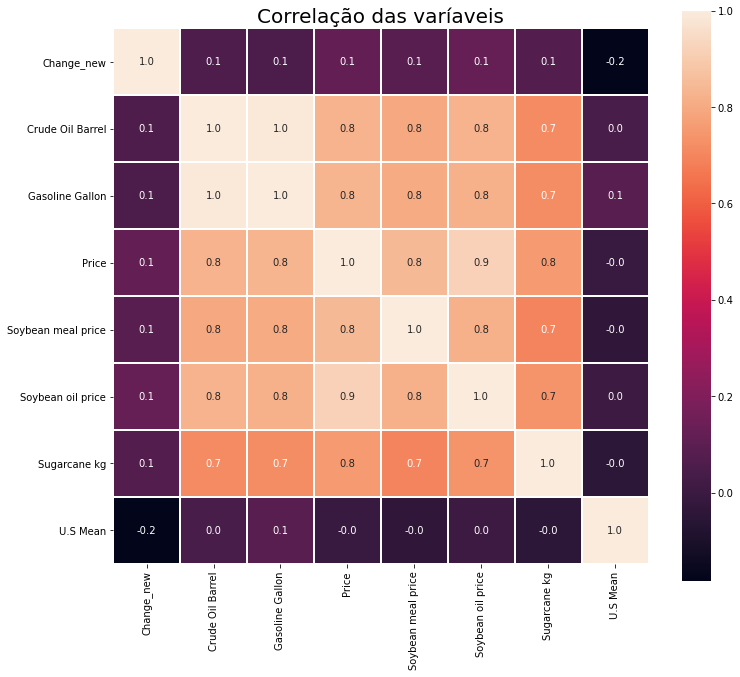

In [11]:
df2 = df[df.columns.difference(['Iowa', 'Minesota', 'Nebraska', 'Illinois', 'Indiana', 'Kansas', 'South Dakota', 'Missouri', 'Winsconsin','Ohio'])]
corr = df2.corr() 
f,ax = plt.subplots(figsize=(12, 10.5))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)

plt.title('Correlação das varíaveis', size=20);


É possível observar graças ao gráfico que a temperatura entre os estados não varia muito, podemos então retirar ela do gráfico para torná-lo mais limpo.
Outra coisa que podemos notar é a ausência da variavel month que é o único indicador que temos para a identificação de um ciclo ecônomico curto.  

In [12]:
df["Month_float"] = df.Month.astype(float)
df

,Month,Price,Change,Iowa,Minesota,Nebraska,Illinois,Indiana,Kansas,South Dakota,...,Soybean oil price,Soybean meal price,Sugarcane kg,Crude Oil Barrel,Gasoline Gallon,Date,Year,U.S Mean,Change_new,Month_float
0,08,185.50,-6.22 %,70.0,67.4,70.6,73.5,72.7,74.5,71.2,...,565.00,270.00,0.27,20.44,0.61,1996/08,1996,71.32,-6.22,8.0
1,09,145.39,-21.62 %,60.7,57.6,60.3,64.2,63.9,65.0,58.8,...,569.00,286.00,0.26,22.26,0.62,1996/09,1996,61.76,-21.62,9.0
2,10,127.85,-12.06 %,51.7,45.2,50.8,54.8,54.4,56.3,46.9,...,528.00,270.00,0.25,23.61,0.66,1996/10,1996,51.68,-12.06,10.0
3,11,117.74,-7.91 %,29.0,20.3,30.0,34.9,35.7,38.2,22.0,...,517.00,274.00,0.24,22.39,0.69,1996/11,1996,30.96,-7.91,11.0
4,12,117.69,-0.04 %,19.6,8.8,22.8,30.5,33.0,32.1,11.5,...,514.00,279.00,0.24,23.62,0.69,1996/12,1996,24.56,-0.04,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,03,245.17,-0.03 %,42.3,35.6,42.6,46.2,45.9,48.0,39.4,...,1284.81,483.90,0.34,63.83,1.99,2021/03,2021,43.16,-0.03,3.0
296,04,268.23,9.41 %,49.2,42.3,46.9,52.5,51.8,52.4,43.6,...,1400.75,464.20,0.36,62.95,1.99,2021/04,2021,48.92,9.41,4.0
297,05,305.31,13.82 %,58.9,55.2,57.9,61.1,59.6,61.8,55.1,...,1568.65,478.82,0.38,66.40,2.12,2021/05,2021,58.56,13.82,5.0
298,06,291.90,-4.39 %,73.4,69.9,72.8,74.1,72.7,75.8,72.3,...,1518.16,467.15,0.38,71.80,2.17,2021/06,2021,72.68,-4.39,6.0


É possível notar então que há grandes correlações entre o preço do milho e a variação de preços de commodities subistitutas de derivados desse

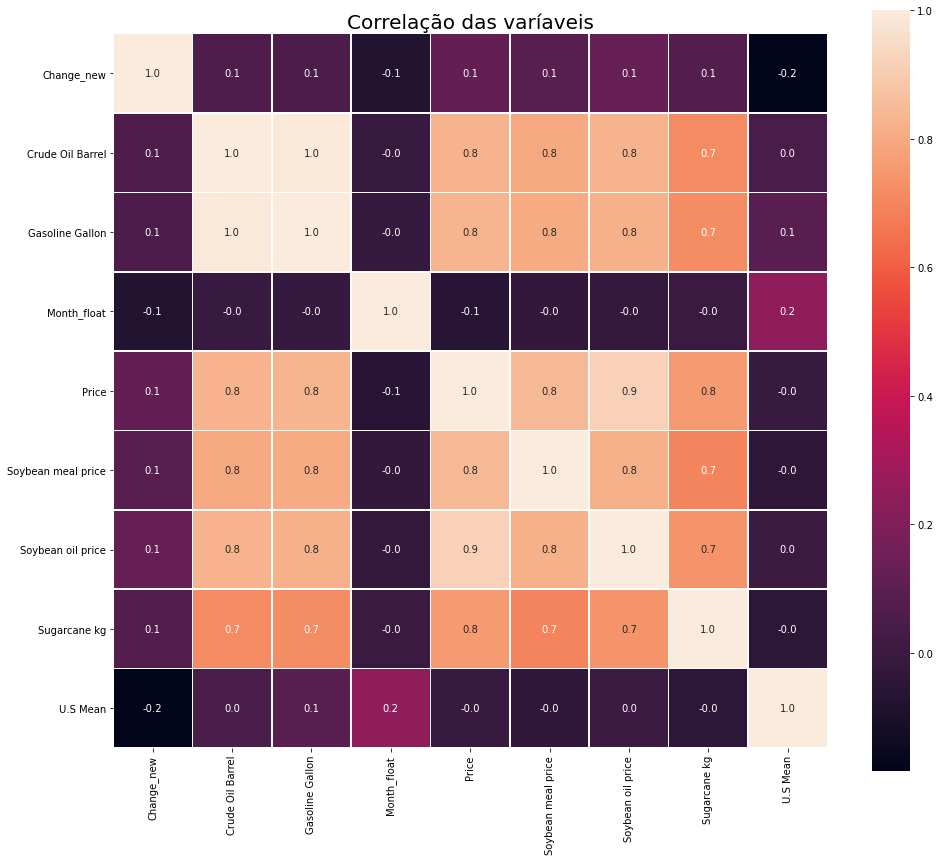

In [13]:
df2 = df[df.columns.difference(['Iowa', 'Minesota', 'Nebraska', 'Illinois', 'Indiana', 'Kansas', 'South Dakota', 'Missouri', 'Winsconsin','Ohio'])]
corr = df2.corr() 
f,ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)

plt.title('Correlação das varíaveis', size=20);

Podemos realmente afirmar que não existe um ciclo econômico curto da commodity milho?

## Ciclo econômico curto

In [14]:
corn_month = df.pivot_table('Price', index='Month', columns='Year', aggfunc=sum)
abs_scaler = MaxAbsScaler()
abs_scaler.fit(corn_month)
abs_scaler.max_abs_
scaled_data = abs_scaler.transform(corn_month)
df_scaled = pd.DataFrame(scaled_data, columns=corn_month.columns)
df_scaled.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
Year,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.783774,0.689218,0.634717,0.634447
1997,0.927586,0.953527,1.000000,0.974922,0.930799,0.878135,0.831191,0.884953,0.879624,0.943260,0.918652,0.889107
1998,1.000000,0.988406,0.995641,0.933833,0.924941,0.908639,0.876210,0.765931,0.752419,0.832796,0.855374,0.834801
1999,1.000000,0.966646,0.987069,0.966030,0.949200,0.961104,0.861966,0.879002,0.887418,0.880542,0.876745,0.894704
2000,0.956232,0.975297,0.974272,0.975810,0.987597,0.864391,0.771525,0.774703,0.824416,0.871566,0.914002,1.000000
2001,1.000000,0.966579,0.948502,0.924750,0.883762,0.875565,0.964057,0.978875,0.946716,0.909721,0.941040,0.965633
2002,0.805852,0.795690,0.785088,0.763361,0.790871,0.824339,0.864640,0.954354,1.000000,0.961100,0.954354,0.937095
2003,0.954840,0.952231,0.949982,0.948723,0.966985,0.965545,0.870907,0.905542,0.936308,0.948093,0.975891,1.000000
2004,0.865318,0.925393,0.957678,1.000000,0.960449,0.923745,0.785393,0.779401,0.733109,0.702547,0.702247,0.714532


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

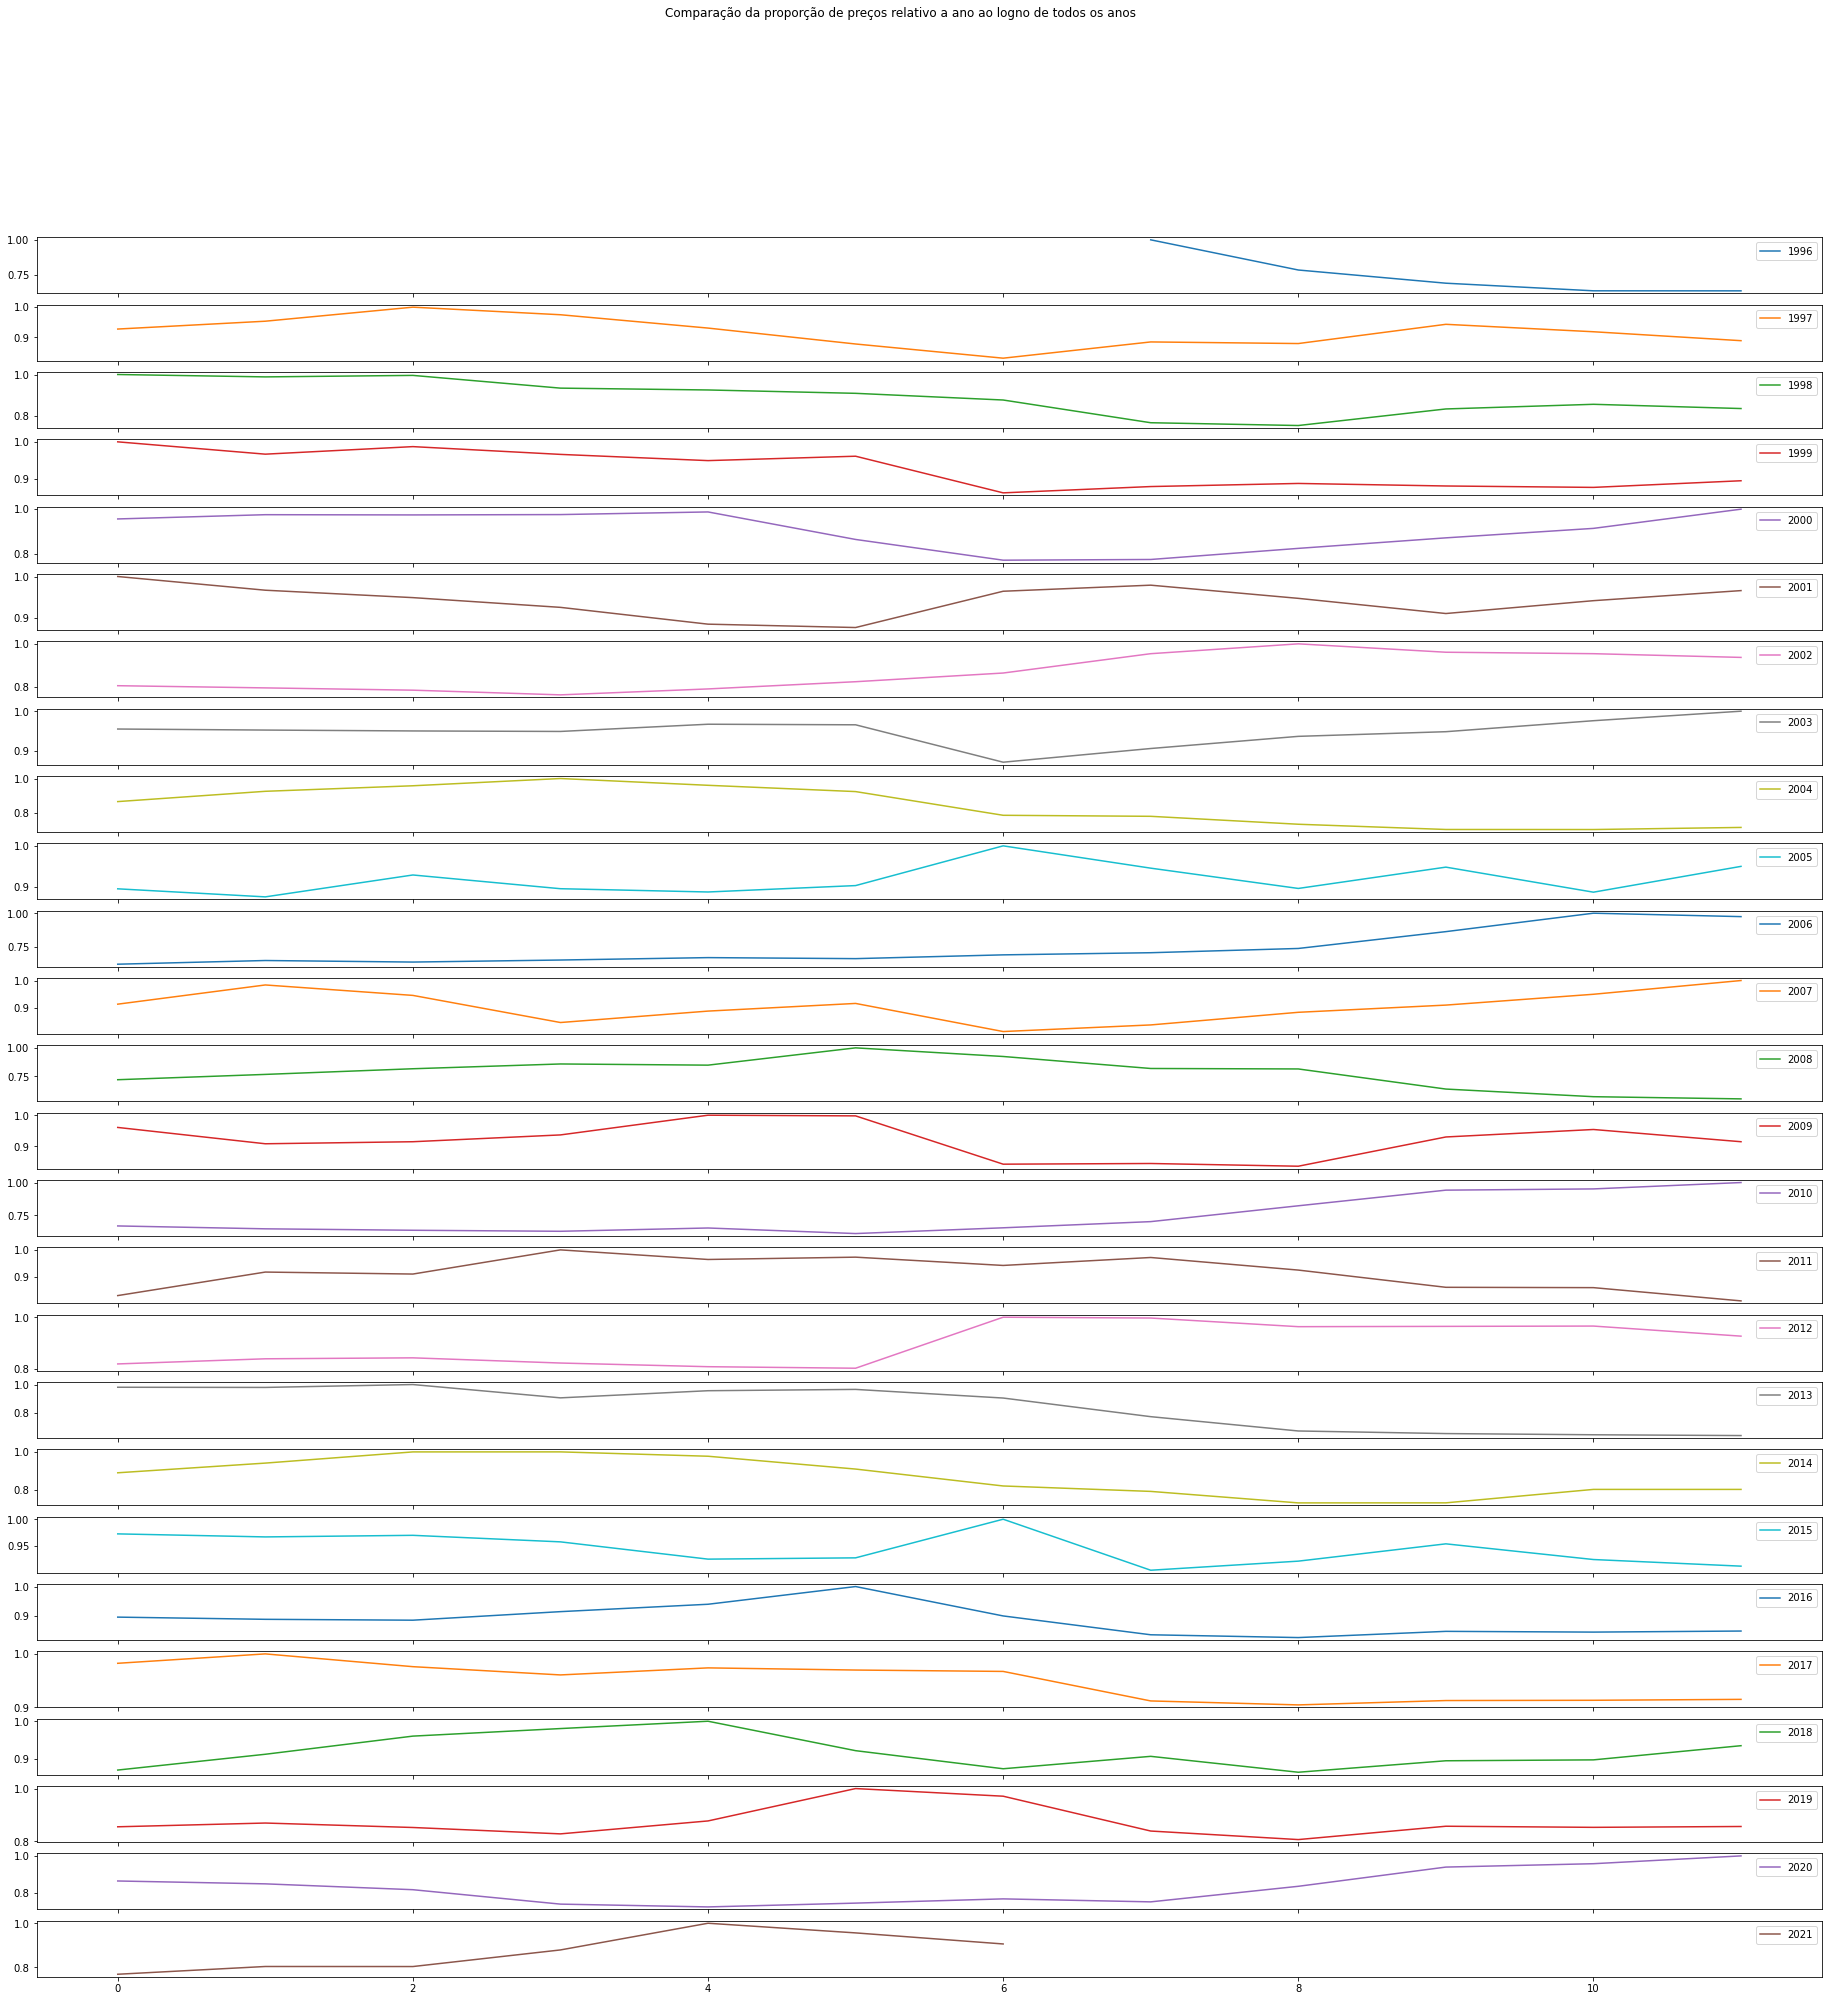

In [15]:
df_scaled.plot(subplots=True, figsize=(32, 32), grid=False, title="Comparação da proporção de preços relativo a ano ao logno de todos os anos")

<AxesSubplot:xlabel='Year'>

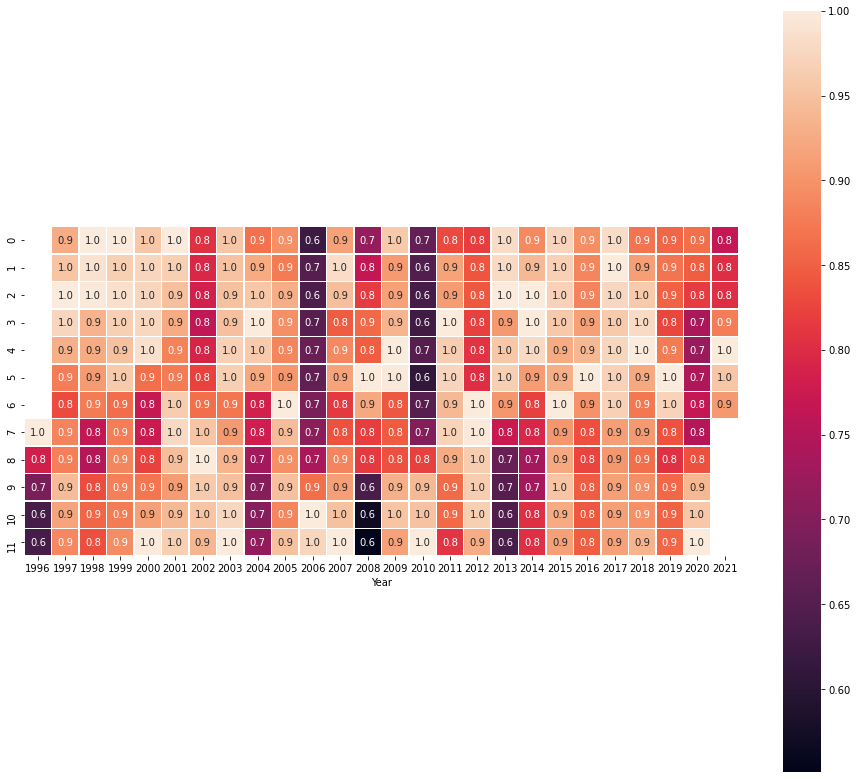

In [16]:
f,ax = plt.subplots(figsize=(16, 14))
sns.heatmap(df_scaled,cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)

In [17]:
df.corr()

,Price,Iowa,Minesota,Nebraska,Illinois,Indiana,Kansas,South Dakota,Ohio,Missouri,Winsconsin,Soybean oil price,Soybean meal price,Sugarcane kg,Crude Oil Barrel,Gasoline Gallon,U.S Mean,Change_new,Month_float
Price,1.000000,-0.007318,-0.009106,-0.007962,-0.002068,0.002711,-0.002335,-0.010578,0.005261,-0.000771,-0.010040,0.917103,0.846381,0.756200,0.825603,0.831702,-0.004611,0.116701,-0.058116
Iowa,-0.007318,1.000000,0.996452,0.991349,0.996989,0.993398,0.991926,0.991435,0.989299,0.996114,0.996484,-0.002328,-0.041334,-0.048881,0.039730,0.081727,0.998711,-0.185641,0.245326
Minesota,-0.009106,0.996452,1.000000,0.987826,0.992061,0.988530,0.986466,0.991699,0.985428,0.989732,0.997985,-0.000717,-0.043166,-0.041619,0.037799,0.079700,0.996198,-0.188104,0.258760
Nebraska,-0.007962,0.991349,0.987826,1.000000,0.986139,0.981393,0.997536,0.996916,0.977052,0.991042,0.985820,-0.002927,-0.032714,-0.050976,0.042035,0.083790,0.993894,-0.187037,0.211821
Illinois,-0.002068,0.996989,0.992061,0.986139,1.000000,0.998849,0.989595,0.984403,0.995896,0.997774,0.995288,0.004700,-0.036593,-0.042990,0.046576,0.087854,0.997798,-0.179405,0.244386
Indiana,0.002711,0.993398,0.988530,0.981393,0.998849,1.000000,0.985551,0.979201,0.998634,0.995411,0.993232,0.009535,-0.030944,-0.039425,0.050971,0.091163,0.995391,-0.179157,0.250703
Kansas,-0.002335,0.991926,0.986466,0.997536,0.989595,0.985551,1.000000,0.992208,0.981234,0.995109,0.986023,0.001247,-0.028595,-0.040884,0.049682,0.090994,0.994773,-0.179778,0.211385
South Dakota,-0.010578,0.991435,0.991699,0.996916,0.984403,0.979201,0.992208,1.000000,0.974931,0.987490,0.987919,-0.002668,-0.038539,-0.054619,0.037516,0.079695,0.993208,-0.187510,0.228443
Ohio,0.005261,0.989299,0.985428,0.977052,0.995896,0.998634,0.981234,0.974931,1.000000,0.991517,0.991301,0.012511,-0.024761,-0.037256,0.053017,0.092525,0.992435,-0.179037,0.265093
Missouri,-0.000771,0.996114,0.989732,0.991042,0.997774,0.995411,0.995109,0.987490,0.991517,1.000000,0.991543,0.004348,-0.033256,-0.041367,0.050161,0.092272,0.997655,-0.179273,0.225772


<AxesSubplot:xlabel='Year', ylabel='Price'>

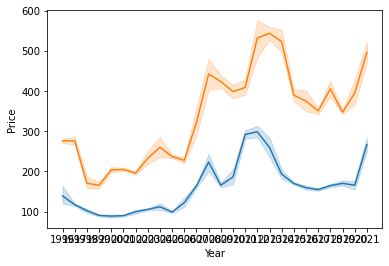

In [18]:
sns.lineplot(data=df, x="Year", y="Price")
sns.lineplot(data=df, x="Year", y="Soybean meal price")

Apesar de serem bens substitutos podemos ver que o preço desses dois produtos fultua da memsa forma. A alta correlação entre as duas variáveis torna complicada a implementação de um modelo. Podemos supor que as duas curvas se assemelham pois elas tem mais correlação com uma terceira variável não presente na tabela do que entre si.   

<AxesSubplot:xlabel='Year', ylabel='Price'>

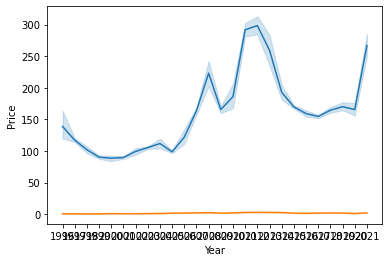

In [19]:
sns.lineplot(data=df, x="Year", y="Price")
sns.lineplot(data=df, x="Year", y="Gasoline Gallon")

In [20]:
var = df.groupby(['Year'])
var_year = var['Year']
var_gas = var['Gasoline Gallon'].mean()
# Criando um novo df com valores normalizados para os produtos
var_price = var['Price'].mean()
var_soy = var['Soybean meal price'].mean()
d = pd.merge(var_gas, var_price, on="Year")
d = pd.merge(d, var_soy, on="Year")


In [21]:
com = pd.read_csv("commodity.csv", sep=";")
com.head(10)

,Month,Index,Change
0,1996/08,55.04,0.42 %
1,1996/09,58.38,0.09 %
2,1996/10,59.16,1.34 %
3,1996/11,59.83,1.13 %
4,1996/12,62.54,4.53 %
5,1997/01,61.62,-1.47 %
6,1997/02,58.68,-4.77 %
7,1997/03,57.86,-1.40 %
8,1997/04,56.00,-3.21 %
9,1997/05,57.39,2.48 %


In [22]:
com['Date'] = com.Month
com[['Year','Month']] = com.Month.str.split("/",expand=True)
com['Change_index'] = com.Change.str.split('%').str[0]
com["Change_index"] = com.Change_index.astype(float)
com.head(10)

,Month,Index,Change,Date,Year,Change_index
0,08,55.04,0.42 %,1996/08,1996,0.42
1,09,58.38,0.09 %,1996/09,1996,0.09
2,10,59.16,1.34 %,1996/10,1996,1.34
3,11,59.83,1.13 %,1996/11,1996,1.13
4,12,62.54,4.53 %,1996/12,1996,4.53
5,01,61.62,-1.47 %,1997/01,1997,-1.47
6,02,58.68,-4.77 %,1997/02,1997,-4.77
7,03,57.86,-1.40 %,1997/03,1997,-1.40
8,04,56.00,-3.21 %,1997/04,1997,-3.21
9,05,57.39,2.48 %,1997/05,1997,2.48


In [23]:
var2 = com.groupby(['Year'])
var_index = var2['Index'].mean()
d = pd.merge(var_index, var_gas, on="Year")

In [24]:
var = df.groupby(['Year'])
var_year = var['Year']
var_gas = var['Gasoline Gallon'].mean()
# Criando um novo df com valores normalizados para os produtos
var_price = var['Price'].mean()
var_soy = var['Soybean meal price'].mean()
d = pd.merge(d, var_price, on="Year")
d = pd.merge(d, var_soy, on="Year")

In [25]:
abs_scaler = MaxAbsScaler()
abs_scaler.fit(d)
abs_scaler.max_abs_
scaled_d = abs_scaler.transform(d)
df_scaled = pd.DataFrame(scaled_d, columns=d.columns)
df_scaled

,Index,Gasoline Gallon,Price,Soybean meal price
0,0.323283,0.222386,0.465235,0.507487
1,0.307564,0.205157,0.392376,0.507395
2,0.259250,0.145650,0.341759,0.313422
3,0.262949,0.184188,0.302318,0.303917
4,0.330960,0.292434,0.296680,0.374811
5,0.307943,0.252479,0.300388,0.376538
6,0.306079,0.245962,0.332658,0.360106
7,0.360042,0.301502,0.353100,0.428070
8,0.433903,0.401530,0.374658,0.478205
9,0.535439,0.529895,0.330651,0.435654


,Index,Gasoline Gallon,Price,Soybean meal price
Index,1.000000,0.983139,0.904759,0.883058
Gasoline Gallon,0.983139,1.000000,0.861529,0.844025
Price,0.904759,0.861529,1.000000,0.888417
Soybean meal price,0.883058,0.844025,0.888417,1.000000


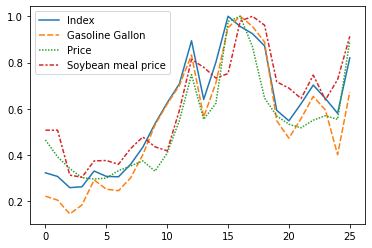

In [26]:
sns.lineplot(data=df_scaled)
df_scaled.corr()

Nós podemos ver através desse gráfico que o indíce de preço das commodities é altamente associado ao preço dos três produtos. Essa influencia da flutuação do mercado na 
Para 

,Index,Gasoline Gallon,Price,Soybean meal price
Index,NaN,NaN,NaN,NaN
Gasoline Gallon,NaN,1.000000,-0.737066,0.001317
Price,NaN,-0.737066,1.000000,-0.392878
Soybean meal price,NaN,0.001317,-0.392878,1.000000


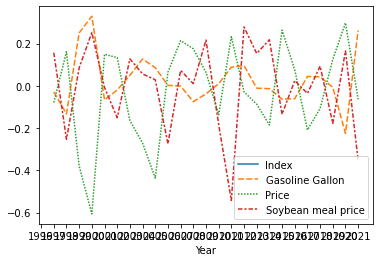

In [27]:
d_pct = d.pct_change()
d_pct = d_pct.diff(axis=1)
sns.lineplot(data=d_pct)
d_pct.corr()

Calculando a diferença entre o percentual de evolução do índice do mercado e os bens substitutos, obtemos um gráfico que se assemelha com a observação esperada. Se analisarmos as curvas elas flutuam de forma oposta.

In [28]:
var_index = com[['Change_index']]
var2 = df[['Gasoline Gallon','Price','Soybean oil price','Sugarcane kg']]
var2 = var2.pct_change()
var_date = df['Date']
var2 = pd.concat([var_index, var2], axis=1)
var2 = var2.diff(axis=1)
var2.head(10)

,Change_index,Gasoline Gallon,Price,Soybean oil price,Sugarcane kg
0,NaN,NaN,NaN,NaN,NaN
1,NaN,-0.073607,-0.232620,0.223306,-0.044117
2,NaN,-1.275484,-0.185157,0.048585,0.033595
3,NaN,-1.084545,-0.124532,0.058244,-0.019167
4,NaN,-4.530000,-0.000425,-0.005378,0.005803
5,NaN,1.441014,0.034678,0.033218,-0.038911
6,NaN,4.695373,0.102592,-0.041074,0.013109
7,NaN,1.383871,0.064867,-0.022173,-0.026565
8,NaN,3.177213,0.007709,0.025078,0.041667
9,NaN,-2.429153,-0.096105,0.045257,-0.040000


In [29]:
# Normalizing Data
df_Us = df[['U.S Mean']]
abs_scaler = MaxAbsScaler()
abs_scaler.fit(df_Us)
abs_scaler.max_abs_
scaled_Us = abs_scaler.transform(df_Us)
df_US = pd.DataFrame(scaled_Us, columns=df_Us.columns)
#Preparing dataset for model
df2 = df2[df2.columns.difference(['Gasoline Gallon','Price','Soybean oil price','Sugarcane kg','Soybean meal price','Crude Oil Barrel','Change','Change_new','U.S Mean','Date','Month'])]
var2 = var2[var2.columns.difference(['Change_index'])]
df2 = pd.concat([df2, var2, df_US ], axis=1)


In [30]:
df2["buy_sell"] = float('NaN')
df2["buy_sell"][df2["Price"] < 0 ] = 0
df2["buy_sell"][df2["Price"] > 0 ] = 1
df2 =df2[df2.columns.difference(['Price'])]
df2 = df2.iloc[1: , :]


<ipython-input-30-d8822e51dc58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["buy_sell"][df2["Price"] < 0 ] = 0
<ipython-input-30-d8822e51dc58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["buy_sell"][df2["Price"] > 0 ] = 1


In [32]:
df2['Gas_change'] = df2['Gasoline Gallon']
df2['Soybean_change'] = df2['Soybean oil price']
df2['Sugar_change'] = df2['Sugarcane kg']
df2 = df2[df2.columns.difference(['Gasoline Gallon','Price','Soybean oil price','Sugarcane kg'])]
df2



,Gas_change,Month_float,Soybean_change,Sugar_change,U.S Mean,Year,buy_sell
1,-0.073607,9.0,0.223306,-0.044117,0.776953,1996,0.0
2,-1.275484,10.0,0.048585,0.033595,0.650145,1996,0.0
3,-1.084545,11.0,0.058244,-0.019167,0.389483,1996,0.0
4,-4.530000,12.0,-0.005378,0.005803,0.308970,1996,0.0
5,1.441014,1.0,0.033218,-0.038911,0.236382,1997,1.0
...,...,...,...,...,...,...,...
295,-0.359318,3.0,0.143864,-0.199134,0.542961,2021,0.0
296,-2.680000,4.0,-0.003818,-0.031415,0.615423,2021,1.0
297,-7.264673,5.0,-0.018375,-0.064309,0.736696,2021,1.0
298,-3.866415,6.0,0.011736,0.032187,0.914329,2021,0.0


## IV. Modeling

+ Select modeling techniques: 
+ Generate test design: 
+ Build model: 
+ Assess model: 

In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet, RidgeClassifierCV, LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.linear_model import lasso_path, enet_path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

import itertools


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
X = df2.drop('buy_sell', axis=1)
y = df2['buy_sell']


In [36]:
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=seed)

In [37]:
modelos = []
modelos.append(('LR', LinearRegression()))
modelos.append(('LASSO', Lasso(random_state=seed)))
modelos.append(('EN', ElasticNet(random_state=seed)))
modelos.append(('KNN', KNeighborsRegressor()))
modelos.append(('CART', DecisionTreeRegressor(random_state=seed)))
modelos.append(('SVR', SVR()))
modelos.append(('RIDGE', Ridge(random_state=seed)))
modelos.append(('RIDGECV', RidgeCV()))

In [38]:
metric = None

In [39]:
resultados = []
nomes = []
for nome, modelo in modelos:
    kfold = KFold(n_splits=len(modelos), random_state=seed, shuffle=True)
    cv_resultados = cross_val_score(modelo, X_train, Y_train, cv=kfold, scoring=metric)
    resultados.append(cv_resultados)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_resultados.mean(), cv_resultados.std())
    print(msg)

LR: 0.177327 (0.179155)
LASSO: -0.095570 (0.160104)
EN: -0.004780 (0.144407)
KNN: -0.000665 (0.212626)
CART: -0.681451 (0.398343)
SVR: -0.640392 (0.552618)
RIDGE: 0.147265 (0.163379)
RIDGECV: 0.177279 (0.172912)


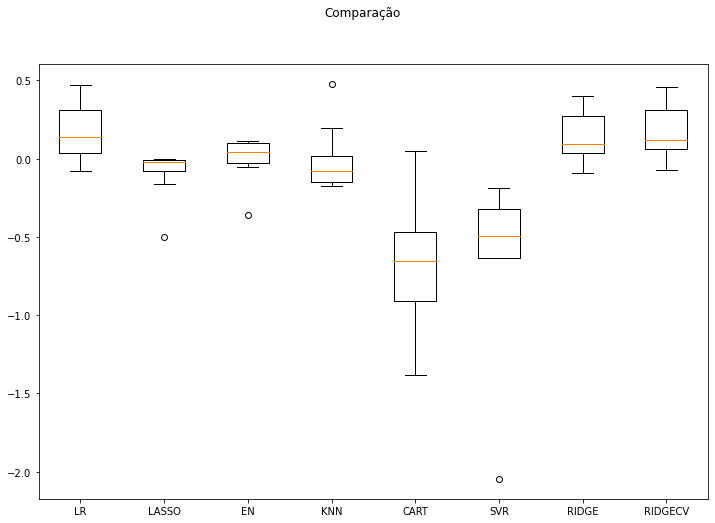

In [40]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Comparação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def clf_eval(clf, X, y_true, classes=['Comprar', 'Vender']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

In [42]:
print(len(Y_train[Y_train == 0]))
print(len(Y_train[Y_train == 1]))

129
110


Classification Report
              precision    recall  f1-score   support

     Comprar       0.76      0.58      0.66        38
      Vender       0.48      0.68      0.57        22

    accuracy                           0.62        60
   macro avg       0.62      0.63      0.61        60
weighted avg       0.66      0.62      0.62        60

ROC Score: 0.6303827751196172
Accuracy Score: 0.6166666666666667
Average Precision Score: 0.44657869012707724
f1 Score: 0.5660377358490567
Confusion matrix, without normalization
[[22 16]
 [ 7 15]]


0.6303827751196172

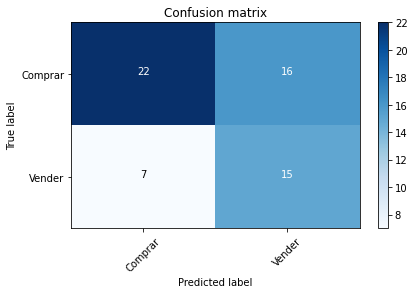

In [43]:
#Modelo Cart
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2)
Cart = DecisionTreeRegressor().fit(X_train, Y_train)
y_pred_ = Cart.predict(X_validation)
Cart.score(X_validation, Y_validation)
clf_eval(Cart, X_validation, Y_validation)

Classification Report
              precision    recall  f1-score   support

     Comprar       0.59      0.85      0.70        26
      Vender       0.83      0.56      0.67        34

    accuracy                           0.68        60
   macro avg       0.71      0.70      0.68        60
weighted avg       0.73      0.68      0.68        60

ROC Score: 0.7024886877828054
Accuracy Score: 0.6833333333333333
Average Precision Score: 0.7116368286445013
f1 Score: 0.6666666666666667
Confusion matrix, without normalization
[[22  4]
 [15 19]]


0.7024886877828054

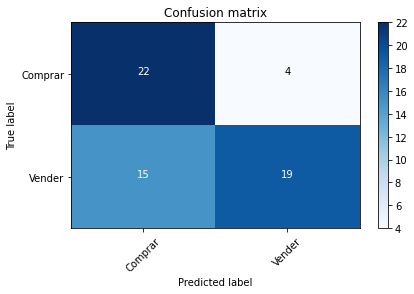

In [44]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2)
LR = RidgeClassifierCV().fit(X_train, Y_train)
y_pred_ = LR.predict(X_validation)
LR.score(X_validation, Y_validation)
clf_eval(LR, X_validation, Y_validation)
